### Simulation

In [1]:
from bmc.simulate import simulate
import numpy as np
import matplotlib.pyplot as plt
import torch

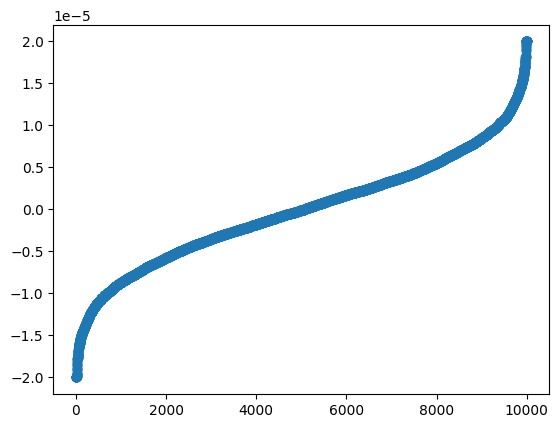

5055

In [2]:
import torch
import matplotlib.pyplot as plt

low = -20e-6
high = 20e-6
n_iso = 10000
mean = (low + high) / 2
std_dev = (high - low) / 6

z_pos = torch.normal(mean=mean, std=std_dev, size=(n_iso,), dtype=torch.float32)
z_pos = torch.cat((z_pos, torch.tensor([0.0], dtype=torch.float32)))  # Füge 0 hinzu
z_pos = torch.clamp(z_pos, min=low, max=high)  # Begrenze Werte auf [low, high]
z_pos, _ = torch.sort(z_pos)  # Sortiere die Werte

# Plotten
plt.plot(z_pos.numpy(), 'o')
plt.show()

index_zero = torch.where(z_pos == 0)[0].item()
index_zero


In [3]:
# seq_path_gauss = '/Users/danielmiksch/JupyterLab/optim/seq_init/simple_gauss.seq'
# seq_path_gauss_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/simple_gauss.seq'
# config_path_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/config_1pool.yaml'

seq_path_gauss = '/Users/danielmiksch/JupyterLab/optim/seq_init/simple_gauss_gradient.seq'
config_path = '/Users/danielmiksch/JupyterLab/optim/seq_init/config_1pool.yaml'

adc_time = 3
retun_zmag = False
show_plot = False
write_all_mag = True
plt_range = [0, 4]
# z_pos = np.linspace(-1e-6, 1e-6, 10001)
iso_select = [-5,0,5]
# z_pos = np.array([0])

In [4]:
sim = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   write_all_mag=write_all_mag, 
                   plt_range=plt_range)  # simulation mac

BMCTool simulation:   0%|          | 0/5 [00:00<?, ?it/s]/Users/danielmiksch/JupyterLab/optim/bmc/bmc_tool.py:42: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1711403251597/work/aten/src/ATen/native/Copy.cpp:301.)
  amp = torch.tensor(block.rf.signal, dtype=torch.float32, device=GLOBAL_DEVICE).abs()
BMCTool simulation: 100%|██████████| 5/5 [04:59<00:00, 59.82s/it]

['rf at 0.0000s', 'gz at 0.0100s', 'rf at 0.0599s', 'gz at 0.0699s', 'adc at 0.1698s']


In [ ]:
# from bmc.utils.eval import plot_sim
# time, m_z, m_z_total, m_c, m_c_total = sim.get_mag()

# iso_select = [-300,0]
# plt_range = [0, .25]

# # _ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
# _ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)



### Animation

In [6]:
run_time = .1
track_path = True
ie = False
timing = False
total_mag = True
kwargs = {'quality': '-qh', 'write': '--write_to_movie'}  #--write_to_movie

In [ ]:
# sim.animate(run_time=run_time, 
#             track_path=track_path, 
#             ie=ie, 
#             timing=timing,
#             total_mag=total_mag, 
#             **kwargs)